In [41]:
!pip install fbprophet

In [42]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
df = pd.read_csv('data_new.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          416 non-null    object 
 1   date                                                416 non-null    object 
 2   total_cases                                         416 non-null    float64
 3   new_cases                                           416 non-null    float64
 4   weekly_new_cases_average                            416 non-null    float64
 5   new_cases_yesterday                                 416 non-null    float64
 6   new_deaths                                          416 non-null    float64
 7   weeky_new_deaths_average                            416 non-null    float64
 8   new_deaths_yesterday                                416 non-null    float64
 9  

In [45]:
df['ds'] = pd.to_datetime(df['date'])
df['y'] = df['new_cases']
df = df[['ds','y']]
train = df[:-15]
test = df[-15:]
# test = test['ds']



In [46]:
model = Prophet(daily_seasonality=True)

In [47]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [48]:
forecast = model.predict(test)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-06,11296.678958,-12196.033843,46541.813296,11296.678958,11296.678958,6891.797851,6891.797851,6891.797851,8382.695192,8382.695192,8382.695192,-1490.897341,-1490.897341,-1490.897341,0.0,0.0,0.0,18188.476809
1,2021-04-07,9340.694648,-9725.949041,53358.602265,9340.694648,9340.694648,11749.321428,11749.321428,11749.321428,8382.695192,8382.695192,8382.695192,3366.626236,3366.626236,3366.626236,0.0,0.0,0.0,21090.016076
2,2021-04-08,7384.710338,-7790.668961,50993.632048,7384.710338,7384.710338,14632.376416,14632.376416,14632.376416,8382.695192,8382.695192,8382.695192,6249.681224,6249.681224,6249.681224,0.0,0.0,0.0,22017.086754
3,2021-04-09,5428.726028,-11701.946894,50749.073974,5392.273185,5428.726028,16208.193526,16208.193526,16208.193526,8382.695192,8382.695192,8382.695192,7825.498334,7825.498334,7825.498334,0.0,0.0,0.0,21636.919555
4,2021-04-10,3472.741719,-16438.644350,43663.539203,3356.507806,3500.688814,10908.186149,10908.186149,10908.186149,8382.695192,8382.695192,8382.695192,2525.490957,2525.490957,2525.490957,0.0,0.0,0.0,14380.927867
5,2021-04-11,1516.757409,-29622.341252,29924.954159,1257.264863,1655.721802,-2974.958181,-2974.958181,-2974.958181,8382.695192,8382.695192,8382.695192,-11357.653373,-11357.653373,-11357.653373,0.0,0.0,0.0,-1458.200772
6,2021-04-12,-439.226901,-30066.283863,32063.925617,-831.062404,-168.262078,1263.949156,1263.949156,1263.949156,8382.695192,8382.695192,8382.695192,-7118.746036,-7118.746036,-7118.746036,0.0,0.0,0.0,824.722255
7,2021-04-13,-2395.211211,-26882.883706,35000.508487,-2972.474052,-1925.924417,6891.797851,6891.797851,6891.797851,8382.695192,8382.695192,8382.695192,-1490.897341,-1490.897341,-1490.897341,0.0,0.0,0.0,4496.586640
8,2021-04-14,-4351.195521,-23645.616757,39255.881457,-5138.981607,-3755.783472,11749.321428,11749.321428,11749.321428,8382.695192,8382.695192,8382.695192,3366.626236,3366.626236,3366.626236,0.0,0.0,0.0,7398.125907
9,2021-04-15,-6307.179831,-24678.646920,36696.095464,-7274.466269,-5539.211886,14632.376416,14632.376416,14632.376416,8382.695192,8382.695192,8382.695192,6249.681224,6249.681224,6249.681224,0.0,0.0,0.0,8325.196586


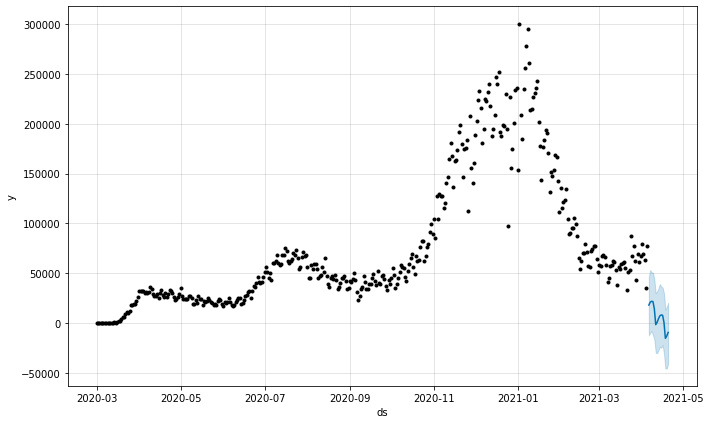

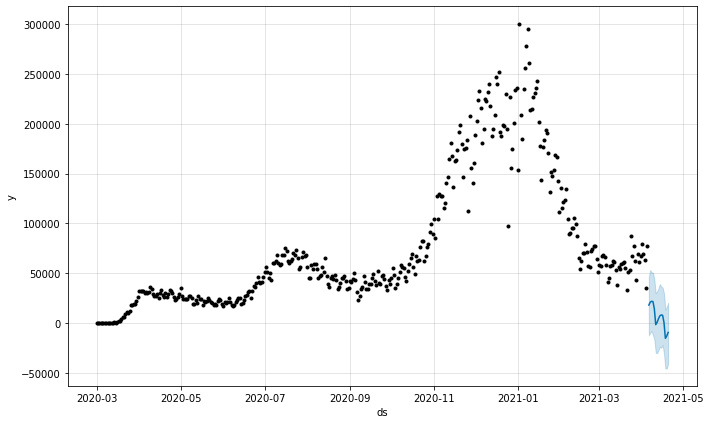

In [50]:
model.plot(forecast)

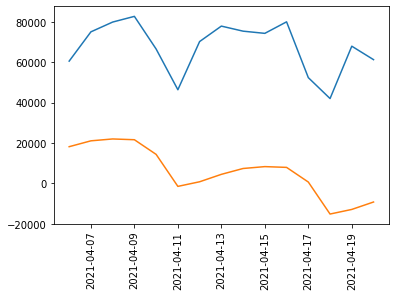

In [54]:
plt.plot(test['ds'],test['y'])
plt.plot(forecast['ds'],forecast['yhat'])
plt.xticks(rotation='vertical')
plt.show()